In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qradient.circuit_logic import McClean
from time import time

In [34]:
times125 = []
for qubit_num in range(20, 1, -1):
    print(qubit_num, end='\r')
    layer_num = 125
    interactions = np.full((qubit_num, qubit_num), None)
    interactions[0, 1] = 1.
    circuit = McClean(qubit_num, {'zz': interactions}, layer_num)
    if qubit_num == 20:
        hide = False
    else:
        hide = True
    t1 = time()
    circuit.grad_run(hide_progbar=hide)
    t2 = time()
    times125.append(t2-t1)

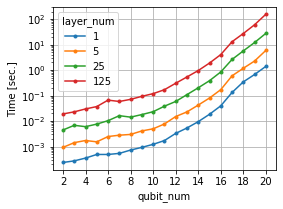

In [45]:
plt.figure(figsize=(4, 3))
plt.plot(range(20, 1, -1), times, '.-')
plt.plot(range(20, 1, -1), times5, '.-')
plt.plot(range(20, 1, -1), times25, '.-')
plt.plot(range(20, 1, -1), times125, '.-')
plt.grid(True)
plt.semilogy()
plt.xlabel('qubit_num')
plt.ylabel('Time [sec.]')
plt.xticks(range(20, 1, -2))
plt.legend([1, 5, 25, 125], title='layer_num')
plt.savefig('timing.png', bbox_inches='tight')